<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>ASN S6O</h3></p>
    <p>CHOQUEUSE Vincent</p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
    <h1>TD4 :  Fonction de transfert échantillonnées</h1>
</div>

### Exercice 1 : Analyse d'une fonction de transfert du 1er ordre - Boucle fermée

Soit un système d'entrée $u_c[n]$, et de sortie $y[n]$ décrit par l'équation de récurrence suivante : 

$$y[n] + 0.3y[n − 1] = 5u_c[n − 1]$$

* On suppose les conditions initiales nulles. La période d'échantillonnage est fixée à $T_e = 0.1$s


**Question 1.** Déterminez la fonction de transfert $F(z) = \frac{Y(z)}{U_c(z)}$. Écrivez la en puissance positive.

**Réponse :** 

La relation de récurrence est tout d'abord exprimée dans le domaine en $Z$ :

$$Y(z)+0.3z^{-1}Y(z)=5z^{-1}U_c(z)$$

On en déduit que

$$F(z)=\frac{Y(z)}{U_c(z)}=\frac{5z^{-1}}{1+0.3z^{-1}}$$

ou de façon équivalente,
$$
F(z)=\frac{5}{z+0,3}
$$

**Question 2.** Caractéristiques de la fonction de transfert $F(z)$:
* Est elle stable ? pourquoi ?
* Calculez son gain statique.
* Calculez la réponse du système à un échelon unité $U[n]$ (originale).
* Représentez graphiquement $y[n]$. Déterminez ses caractéristiques temporelles : temps de réponse,
dépassement, facteur d'amortissement équivalent à un second ordre et valeur finale.

> Remarque 1 : "Facteur d'amortissement équivalent à un second ordre" : veut dire qu'on assimile la réponse indicielle à celle d'un système du second ordre continu et on déduit les caractéristiques équivalentes à l'aide des tables et documents de cours.

> Remarque 2 : Vous pouvez constater que F(z) est une FT du 1er ordre et sa réponse à un échelon présente un dépassement Il s'agit d'une particularité pour les systèmes échantillonnés du 1er ordre. Par contre, une FT continue du 1er ordre ne présente jamais de dépassement sur sa réponse indicielle

**Réponse :** 

**Réponse :**

Nous obtenons les résultats suivants :

* La fonction $F(z)$ est stable car le module de son pôle $z_1 = -0,3$ est inférieur à 1 : $\vert z_1 \vert =0.3<1$.
* Le gain statique se calcule en prenant $z=1$, on obtient $F(1)=5/1.3=3.85$.
* Le système est excité par un échelon unité : $u_c[n]=U[n]$. Dans ce cas, d'après la table de TZ, $U_c(z)=\frac{z}{z-1}$ et donc
            
$$Y(z)=F(z)U_c(z)=\frac{5}{z+0.3}\frac{z}{z-1}$$

Le signal original $y[n]$ ne peut être obtenu directement à partir de la table de TZ d'où la décomposition en éléments simples. Pour cette approche :
$$\frac{Y(z)}{z}=\frac{c_1}{z+0.3}+\frac{c_2}{z-1}$$
    avec 
        \begin{align*}
            c_1 &=\left[(z+0,3).\frac{Y(z)}{z}\right]_{z=-0.3}=-\frac{5}{1.3}\\
            c_2 &=(z-1).\left[\frac{Y(z)}{z}\right]_{z=1}=\frac{5}{1.3}
        \end{align*}
    On en déduit d'après la table que
    \begin{equation*}
        y[n]=TZ^{-1}(Y(z))=3.85.(1-(-0.3)^n)u[n]
    \end{equation*}
    

Text(0.5, 0, 'time (s)')

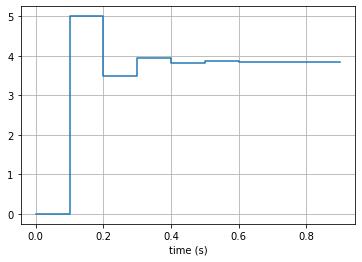

In [23]:
import numpy as np
import matplotlib.pyplot as plt

y_n_1 = 0
Te= 0.1
y = []
t = []
for n in range(10):
    if n >=1 :
        u_n_1 = 1
    else:
        u_n_1 = 0
        
    y_n = 5*u_n_1 - 0.3*y_n_1
    
    y_n_1= y_n 
    y.append(y_n)
    t.append(n*Te)
    
plt.step(t,y,where='post')
plt.grid()
plt.xlabel("time (s)")

##### Caractéristique de la réponse indicielle

* Valeur finale : $\lim_{n\to+\infty} y[n]=\lim_{z\to1}(z-1)Y(z)=\frac{5}{1,3}=3.85$.
* Temps de réponse : $t_r=3T_e=0.3s$.
* Dépassement : $D=30\%\Leftrightarrow$ facteur d'amortissement équivalent d'un second ordre $m=0.35$.

        
> Remarque : Vous pouvez constater que $F(z)$ est une FT du $1^{er}$ ordre et sa réponse à un échelon présente un dépassement  Il s'agit d'une particularité pour les systèmes échantillonnés du $1^{er}$ ordre. Par contre, une FT continue du $1^{er}$ ordre ne présente jamais de dépassement sur sa réponse indicielle.

**Question 3.** Soit les équations de récurrence :
    
\begin{align}
\epsilon[n]&=x[n]-y[n]\\
u_c[n]&=A\epsilon[n]
\end{align}

Calculez la fonction de transfert échantillonnée $H(z) =\frac{Y (z)}{X(z)}$ du système d'entrée $x[n]$ sortie $y[n]$ en employant deux méthodes.

* 1ère méthode (classique) : passage des équations de récurrence en Z, puis résolution du système.
* 2ème méthode : représentation sous forme de schéma bloc de chaque équation. Observez que l'on retrouve la structure de l'asservissement de la FT $F(z)$ à l'aide d'un correcteur proportionnel, $H(z)$ est alors la fonction de transfert en boucle fermée.



**Réponse :** 

* Méthode classique : passage des équations de récurrence en Z, puis résolution du système.  
        

\begin{align*}
\varepsilon(z)&=X(z)-Y(z) \\
U_c(z)&= A\varepsilon(z) \\
zY(z)+0.3Y(z)&=5U_c(z)
\end{align*}
        
A partir de ces équations :
        $$H(z)=\frac{Y(z)}{X(z)}=\frac{5.A}{z+(3+5A)}$$
       
* 2ème méthode : Soit les équations de récurrence suivantes :
       
\begin{align}
\epsilon[n]&=x[n]-y[n]  \tag{comparateur erreur}\\
        u_c[n] &= A\epsilon[n]  \tag{correcteur proportionnel} \\
        y[n]+0,3y(n-1) &= 5u_c[n-1] \tag{FT à asservir $F(z)$}
\end{align}
         
         
<figure style="padding-top: 40px">
    <img src="img/ftbf.png" style="width: 400px">
    <figcaption style="text-align:center;font-style: italic;">Fig1. Système en boucle fermée</figcaption>
</figure>


On déduit de ces relations que

$$H(z)=\frac{Y(z)}{X(z)}=\frac{AF(z)}{1+AF(z)}=\frac{5A}{z+(0,3+5A)}$$


**Question 4.** Calcul du correcteur proportionnel $C(z) = A$

On propose le cahier des charges suivant : la sortie $y[n] = \alpha x[n − 1]$. La sortie $y[n]$ est donc la recopie de l'entrée avec un retard de $T_e$ seconde et un gain (ou atténuation) de $\alpha$.

Déterminez le correcteur proportionnel consiste à déterminer $C(z) = A$ qui permet de respecter ce cahier des charges.

* Soit $H_m(z)$ la FT qui correspond à notre objectif, donné par l'équation de récurrence précédente.
Déterminez $H_m(z) = \frac{Y (z)}{X(z)}$
* Respecter strictement le cahier des charges signifie ici assurer $H(z) = Hm(z)$. Déterminez la valeur du correcteur proportionnel $C(z) = A$.
* Quelle est alors la valeur de $\alpha$ ?
* Tracez la réponse à un échelon unité de la fonction de transfert en boucle fermée et corrigée H(z). Donnez ses caractéristiques temporelles.

**Réponse :** 

La relation $y[n] = \alpha .x[n-1]$ s'exprime dans le domaine en Z comme
    $$H_m(z)=\frac{Y(z)}{X(z)}=\alpha z^{-1}=\frac{\alpha}{z}$$
   
Or, nous avons obtenu
    $$H(z) =\frac{5A}{z+(0.3+5A)}$$
    
En imposant $H_m(z)=H(z)$, nous obtenons l'égalité $0.3+5A=0$, c'est à dire $A=-0.3/5=-0,06$. Dans ce cas $H(z)=5Az^{-1}$, et donc 
    
$$\alpha=5A=-0.3$$


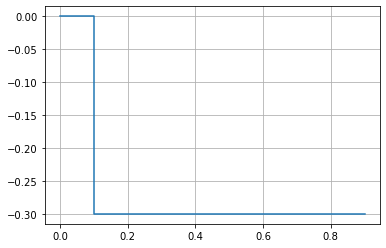

In [24]:
A = -0.06
u_n_1 = 0
y_n_1 = 0


t = []
y = []
for n in range(10):
    if n >= 0:
        x = 1
    else:
        x = 0
        
    y_n = 5*u_n_1 - 0.3*y_n_1
    epsilon = x-y_n
    u_n = A*epsilon
    
    # update
    y_n_1 = y_n
    u_n_1 = u_n
    
    # store
    y.append(y_n)
    t.append(n*Te)
    
plt.step(t,y,where='post')
plt.grid()

##### Caractéristique de la réponse indicielle

* Le gain statique du système correspond à $H(1)=\alpha=-0.3$.
* La valeur finale est : $y[\infty]= -0.3$.
* Temps de réponse : $t_r=T_e=0.1s$.
* Dépassement : $D=0\%\Leftrightarrow$ facteur d'amortissement équivalent d'un second ordre $m>1$